# 소프트맥스 회귀 Softmax Regression - 다항분류
## 다항분류(다중 클래스 분류)의 이해
### 1) 다항 분류
- 이진 분류: 두 개의 선택지 중 하나를 고르는 문제
    -> 로지스틱 회귀
- `다항 분류`: 세 개 이상의 선택지 중 하나를 고르는 문제
    -> 소프트맥스 회귀


### 2) 소프트맥스 함수
- `다항 분류 활성화 함수`
- 뉴런의 출력값에 대하여 class 분류를 위하여 마지막 단계에서 `출력값에 대한 정규화를 해주는 함수`
- 결과물의 수치의 합은 언제나 1.0
- 소프트맥스 함수의 출력값은 확률로 해석할 수 있다
> 사진 속 인물이 지금 슬픈 표정인지, 웃는 표정인지, 화난 표정인지 확률적으로 수치화 한다고 했을 때,
>
> 슬픔(11%), 웃음(29%), 화남(60%)과 같이 확률적 분류를 할 때 용이

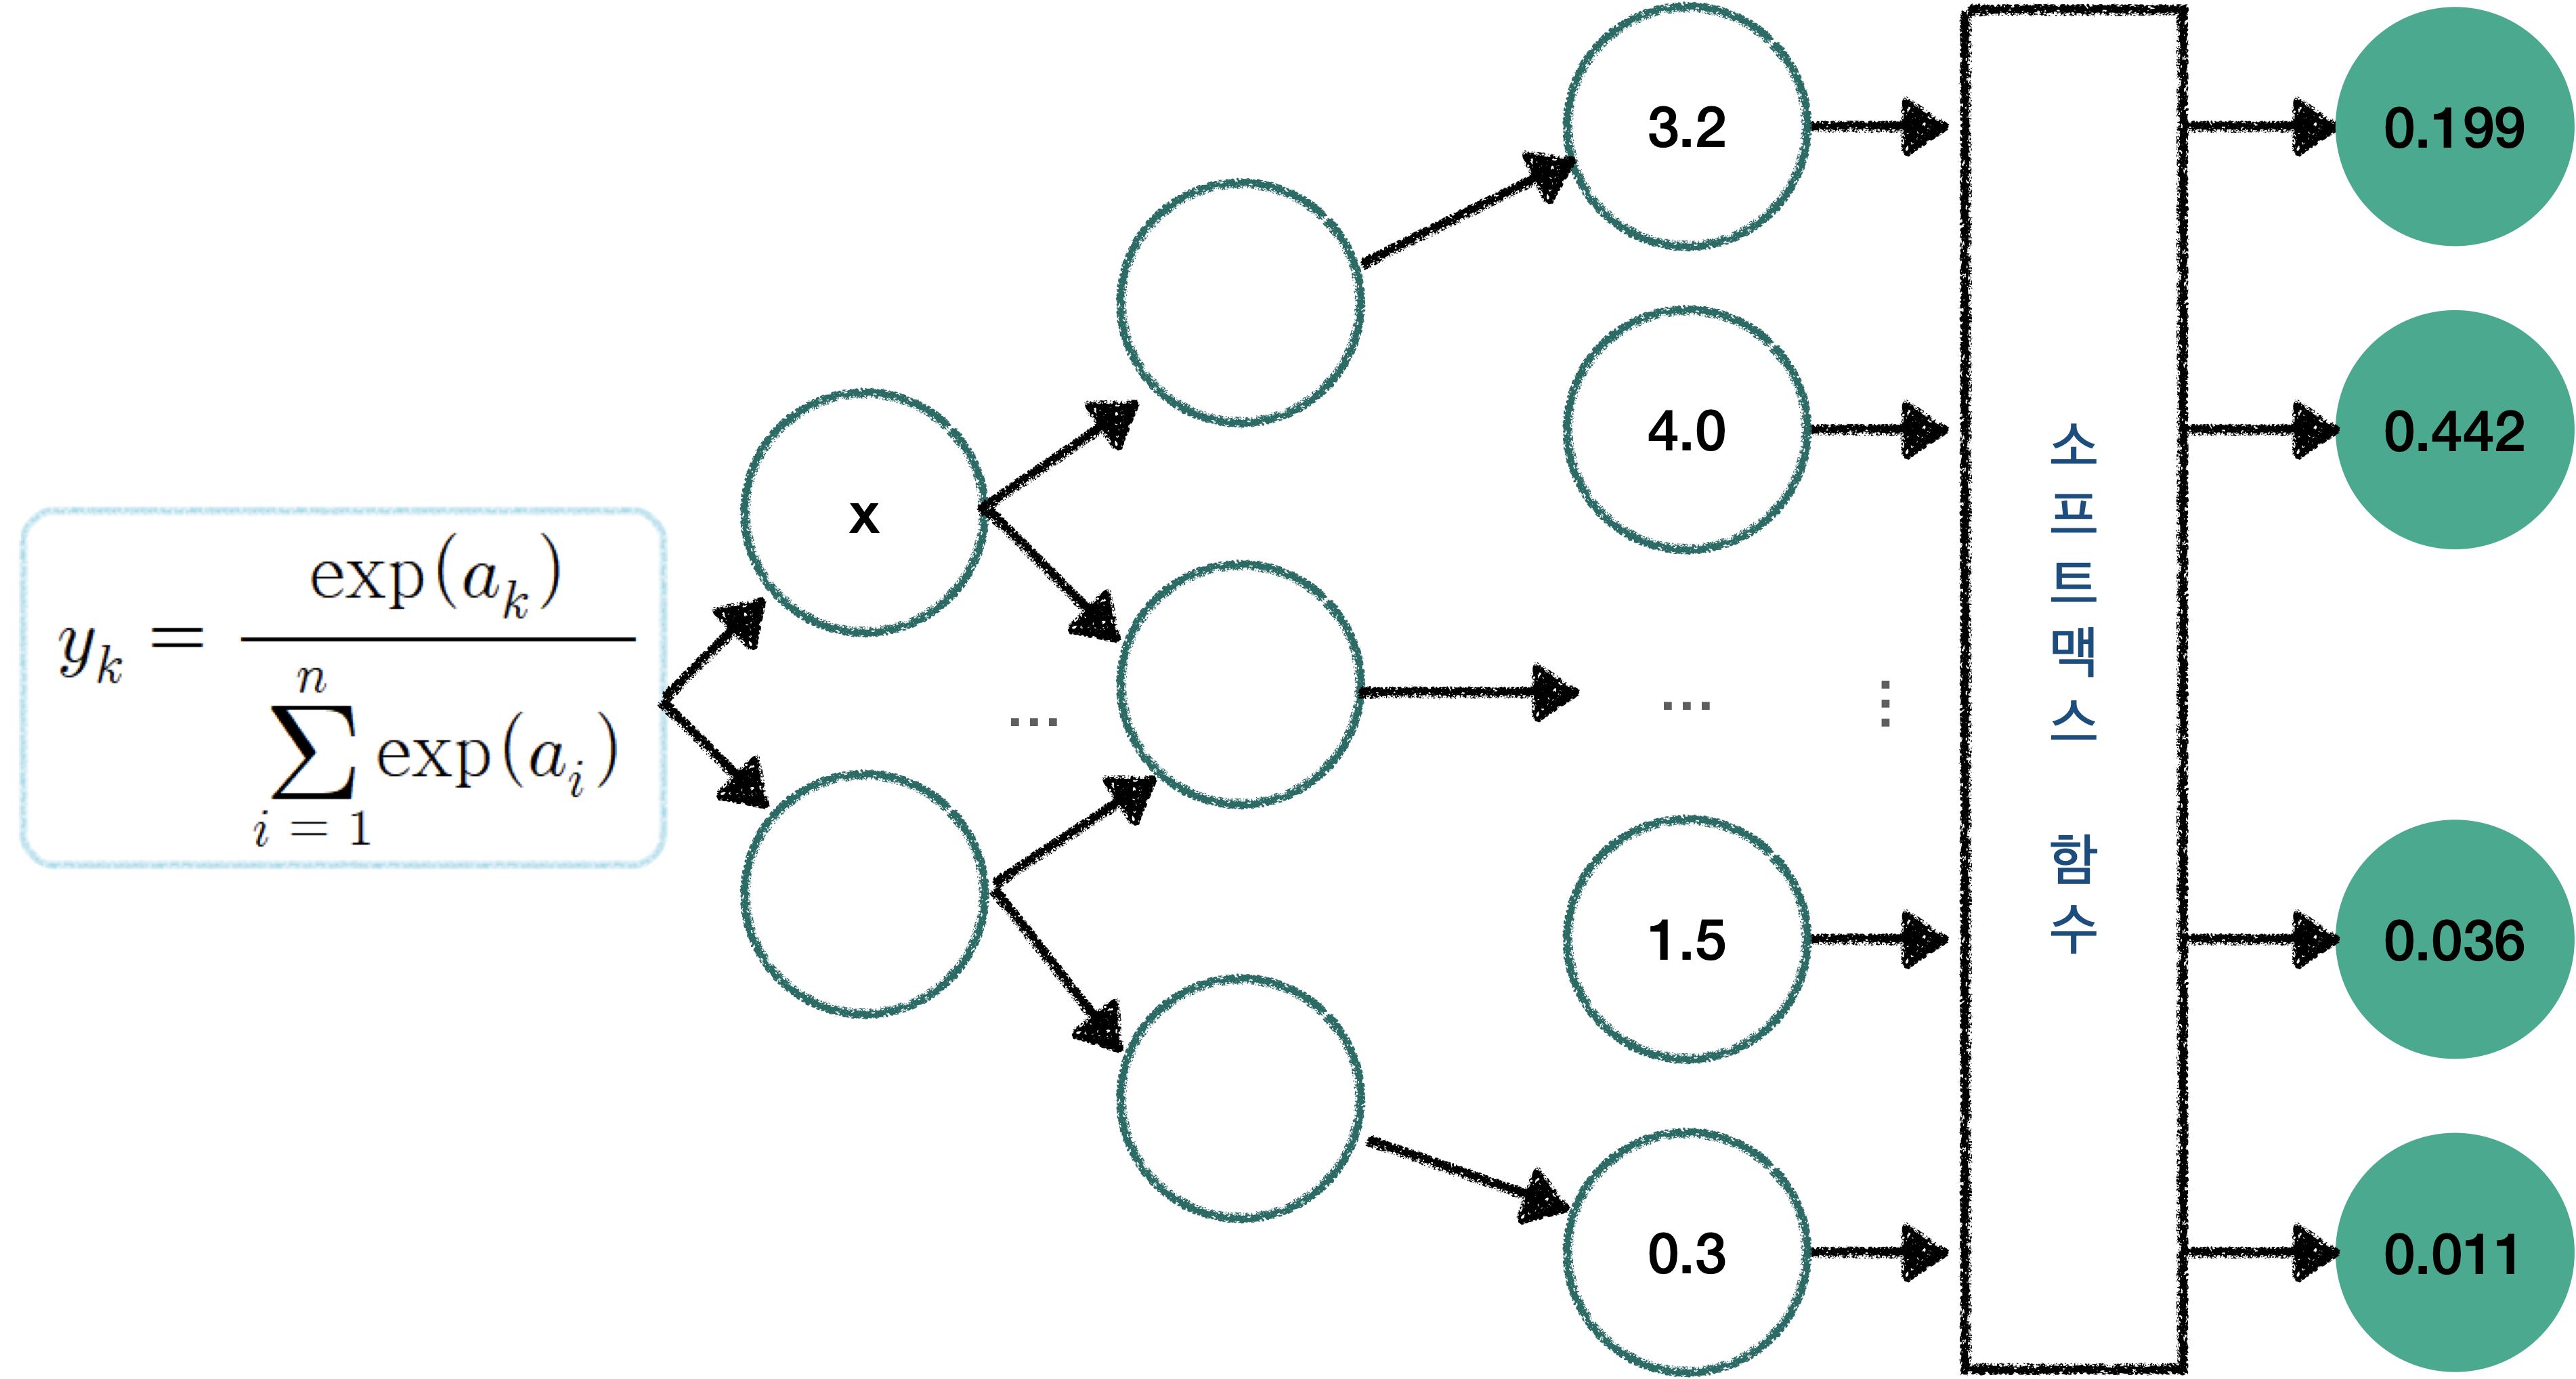

In [1]:
from IPython.display import display, Image
display(Image(filename='image22_softmax.png'))

- exp(x)는 지수함수(Exponential Function)이다. (e는 자연상수)
- n은 출력층의 뉴런 수, yk는 그 중 k번째 출력을 뜻한다

## 소프트맥스 회귀 (다항분류) 수행

### 1) 패키지 준비하기

In [ ]:
import sys
sys.path.append('../../')
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame, pivot_table
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

### 2) 데이터셋 준비하기
- 아이리스(붓꽃)의 꽃잎에 대한 각 부분의 너비와 길이 등을 측정한 데이터이며 `150`개의 레코드로 구성
- 꽃받침의 길이, 너비, 꽃잎의 길이, 너비 등을 토대로 `3가지로 나뉘는 붓꽃의 종류`를 분류하는 학습 모델을 구성할 수 있다

In [ ]:
origin = read_excel('https://data.hossam.kr/F03/iris.xlsx')
origin.head()

### 3) 데이터 전처리
- 결측치 확인

In [2]:
origin.isna().sum()

NameError: name 'origin' is not defined

- 종속변수 라벨링을 위해 값의 종류 확인

In [ ]:
uni = origin['Species'],unique()
print(uni)

- 종속변수 라벨링

In [ ]:
origin['Species'] = origin['Species'].astype('category').cat.rename_categories('setosa': 0, 'virginica': 1, 'versicolor': 2)
origin['Species'].value_counts()

### 4) 탐색적 데이터 분석
- 기본통계 확인

In [ ]:
origin.describe()

- 산점도 행렬 확인
> 종속변수로 `hue`를 적용했을 때 뚜렷한 군집을 나타내는지 확인하기 위함

In [ ]:
ax = sb.pairplot(origin, 
                 hue='Species',
                 kind='kde',
                 plot_kws={'alpha': 0.3})
ax.map_lower(sb.scatterplot)
ax.map_upper(sb.reglot, scatter=False, truncate=False, ci=False)
plt.show()
plt.close()

### 5) 데이터셋 분할
- 랜덤시드 고정

In [3]:
np.random.seed(777)

NameError: name 'ᅦ' is not defined

- 훈련데이터(독립변수)와 레이블(종속변수) 구분하기

In [ ]:
x = origin.drop(['Species'], axis=1)
y = origin['Species']
x.shape, y.shape

- 종속변수에 대한 one-hot-encoding
    - 통상적인 더미변수 처리
    - 단 계산(회귀식)을 위한 처리가 아닌 `분류를 위한 처리`이므로 1번째 항목을 제외해서는 안 된다.

In [ ]:
y

In [ ]:
y_categ = to_categorical(y)
y_categ

- 훈련데이터와 검증데이터로 분할

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y_categ,
                                                    test_size = 0.3,
                                                    random_state=777)
print('훈련용 데이터셋 크기: %s, 훈련용 레이블셋 크기: %s' % (x_train.shape, y_train.shape))
print('검증용 데이터셋 크기: %s, 검증용 레이블셋 크리: %s' % (x_test.shape, y_test.shape))

### 6) 모델 개발
- 모델 정의

In [ ]:
my_model = Sequential()
my_model.add(Dense(64, activation='relu', input_shape(4, )))
my_model.add(Dense(3, activation='softmax'))
my_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
my_model.summary()

- 학습하기

In [ ]:
result = my_model.fit(x_train, 
                      y_train, 
                      epochs=500, 
                      validation_data=(x_test, y_test),
                      callbacks= [EarlyStopping(monitor='val_loss',
                                                patience=5,
                                                verbose=1),
                                  ReduceLROnPlateau(monitor='val_loss',
                                                    patience=3,
                                                    factor=0.5,
                                                    min_lr=0.0001,
                                                    verbose=1)])

### 7) 학습 결과 평가
- 기본적인 머신러닝 학습결과 평가

In [ ]:
helper.tf_result_plot(result)

evaluate1 = my_model.evaluate(x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 정확도: %f' % (evaluate1[0], evaluate1[1]))

evaluate2 = my_model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 정확도: %f' % (evaluate2[0], evaluate2[1]))

### 8) 학습 결과 적용
- 테스트 데이터에 대한 예측 결과 산정

In [ ]:
results = my_model.predict(x_Test)
data_count, case_count = results.shape
print('%d개의 검증 데이터가 각각 %d개의 경우의 수를 갖는다.' % (data_count, case_count))
print(results)

- 가장 큰 확률 값의 인덱스들만 별도의 리스트로 생성

In [ ]:
arg_results = np.argmax(results, axis=-1)
arg_results

- 결과 데이터셋 구성

In [ ]:
result_df = DataFrame({'실제값': np.argmax(y_test, axis= -1),
                       '분류결과': arg_results})

result_df

- 컬럼에 따른 값의 종류 형태로 데이터 재배치

In [ ]:
mdf = result_df.melt()
mdf.reset_index(inplace=True)
mdf

In [ ]:
df = pivot_table(mdf,
                 index='value',
                 columns='variable',
                 values='index',
                 aggfunc='count')
df

In [ ]:
cm = confusion_matrix(result_df['실제값'], result_df['분류결과'])
cmdf1 = DataFrame(cm,
                  index=[['실제값', '실제값', '실제값'],
                             [0,1,2]],
                  columns = [['분류결과', '분류결과', '분류결과'],
                             [0,1,2]])
cmdf1